In [9]:
import base64
import os
from cloudflare import Cloudflare
from IPython.display import Image, display

# Configuration
ACCOUNT_ID = "8a0e86936ffdb69b5d71eb42c4873a33"
API_TOKEN = "z9NPe81vZqqfohfpH0Tb1rmgE1Ap3xPSe2Y11h3Z"
MODEL_ID = "@cf/meta/llama-4-scout-17b-16e-instruct"

# Initialize the Cloudflare client
client = Cloudflare(
    api_token=API_TOKEN,
    # account_id=ACCOUNT_ID
)

print("Client initialized.")

Client initialized.


In [10]:
def encode_image_to_data_uri(file_path):
    """
    Encodes a local image file to a Base64 Data URI.
    """
    mime_type = "image/jpeg" # Default fallback
    
    # Determine mime type based on extension
    ext = file_path.lower().split('.')[-1]
    if ext in ['png']:
        mime_type = "image/png"
    elif ext in ['jpg', 'jpeg']:
        mime_type = "image/jpeg"
    elif ext in ['webp']:
        mime_type = "image/webp"
        
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        
    return f"data:{mime_type};base64,{encoded_string}"

print("Image helper defined.")

Image helper defined.


In [11]:
def run_ocr_pipeline(image_path):
    # 1. Display the image in the notebook for verification
    display(Image(filename=image_path, width=300))
    
    # 2. Encode image
    print(f"Processing {image_path}...")
    image_data_uri = encode_image_to_data_uri(image_path)
    
    # 3. Construct the message payload
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": "Identify and transcribe all the text visible in this image. Output only the detected text."
                },
                {
                    "type": "image_url", 
                    "image_url": {
                        "url": image_data_uri
                    }
                }
            ]
        }
    ]

    # 4. Call the Workers AI API
    try:
        # UPDATED SYNTAX: Use client.ai.run instead of client.workers.ai.run
        response = client.ai.run(
            model_name=MODEL_ID,
            account_id=ACCOUNT_ID,
            messages=messages
        )
        
        # 5. Extract and return the result
        # Inspecting response structure to ensure we get the text
        if hasattr(response, 'result'):
            return response.result
        elif isinstance(response, dict):
            # Some models return {'result': {'response': '...'} } or directly {'response': '...'}
            if 'response' in response:
                return response['response']
            elif 'result' in response:
                 return response['result']
        
        return response 
            
    except Exception as e:
        return f"Error running inference: {e}"

print("Pipeline function defined.")

Pipeline function defined.


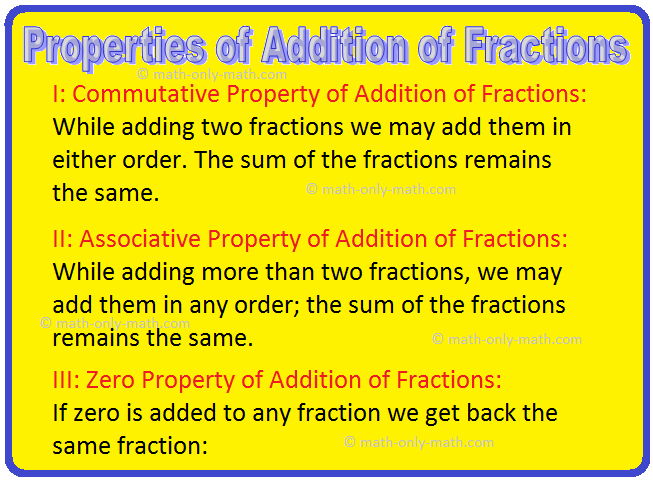

Processing image.png...

--- OCR Result ---

Properties of Addition of Fractions

I: Commutative Property of Addition of Fractions: 
While adding two fractions we may add them in either order. The sum of the fractions remains the same.

II: Associative Property of Addition of Fractions: 
While adding more than two fractions, we may add them in any order; the sum of the fractions remains the same.

III: Zero Property of Addition of Fractions: 
If zero is added to any fraction we get back the same fraction:


In [12]:
# Replace with your actual image filename
image_filename = "image.png" 

# Create a dummy file if it doesn't exist for testing purposes (Optional)
if not os.path.exists(image_filename):
    print(f"File {image_filename} not found. Please upload an image.")
else:
    # Run the pipeline
    ocr_result = run_ocr_pipeline(image_filename)
    
    print("\n--- OCR Result ---\n")
    print(ocr_result)